<a href="https://colab.research.google.com/github/YoshifumiMiyagi/KD_ML/blob/main/IP2_shizuoka_chutou_Unsupervised_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
SEED=42
import numpy as np
import pandas as pd
import codecs

In [223]:
with codecs.open("/content/drive/MyDrive/R5_9_16DB1_Shizuoka_Unsupervised.csv", "r", "Shift-JIS", "ignore") as file:
    df = pd.read_table(file, delimiter=",")

In [224]:
df.columns

Index(['施設', 'ID', 'Age (y)', 'Age (m)', 'Age', 'Age_0:4_1:7_2:8', 'Length',
       'Weight', 'sex', '5th Criteria count', '5th Criteria count_1',
       'BCG_non0_posi1', 'Onset date', 'Treat date',
       'TreatAre_0:before_1:2011_2:2016', 'Season', 'Treat day',
       'IVIG-non-responder_1', 'Second_line_nonresponders',
       'Non_responder_0_1_first_2_second', 'IVIG_first', '2nd_line', '3nd Tx',
       '4nd Tx', 'PSLnon0_use1', 'IFX_non0_use1', 'preWBC_1', 'postWBC_1',
       'FC_WBC', 'preNetro', 'post Netro', 'FC_Ne', 'pre_Lym', 'post_Lym',
       'N_L_ratio', 'preCRP_1', 'postCRP_1', 'FC_CRP', 'prePlt', 'postPlt',
       'FC_Plt', 'N_P_ratio', 'preTbil', 'postTbil', 'FC_Tbil', 'preAST',
       'postAST', 'FC_AST', 'preALT', 'postALT', 'FC_ALT', 'preNa@', 'postNa@',
       'FC_Na', 'preIgG', 'postIgG', 'FC_IgG'],
      dtype='object')

In [225]:
df = df.loc[:,['Age', 'Length', 'Weight', 'sex', '5th Criteria count_1', 'Season',
       'Treat day',
       'IVIG-non-responder_1', 'Second_line_nonresponders', 'PSLnon0_use1', 'IFX_non0_use1',
       'preWBC_1',  'preNetro',  'pre_Lym', 'preCRP_1',
       'prePlt','preTbil','preAST', 'preALT', 'preNa@', 'preIgG']]
df.columns = ['Age', 'Length', 'Weight', 'Sex', 'Criteria', 'Season',
       'Treat day',
       'IVIG-nonres', 'Second_line_nonres', 'PSL_use1', 'IFX_use1',
       'WBC',  'Neutrophil',  'lymphocyte', 'CRP',
       'Plt','Tbil','AST', 'ALT', 'Na', 'IgG']
df['Sex'] = df['Sex'].replace('male',0).replace('female',1)
df['Season'] = df['Season'].replace('Spring',0).replace('Summer',1).replace('Autum',2).replace('Winter',3)

In [226]:
df_ex_IFX_1st = df[(df['IFX_use1'] == 0)&(df['Second_line_nonres']==0)]
df_ex_IFX_1st.shape

(1153, 21)

In [227]:
df_IVIG_res = df_ex_IFX_1st[(df_ex_IFX_1st['IVIG-nonres'] == 0)&(df_ex_IFX_1st['PSL_use1']==0)]
df_IVIG_res['Group'] = 1
df_IVIG_nonres = df_ex_IFX_1st[(df_ex_IFX_1st['IVIG-nonres'] == 1)&(df_ex_IFX_1st['PSL_use1']==0)]
df_IVIG_nonres['Group'] = 3
df_IVIG_PSL_res = df_ex_IFX_1st[(df_ex_IFX_1st['IVIG-nonres'] == 0)&(df_ex_IFX_1st['PSL_use1']==1)]
df_IVIG_PSL_res['Group'] = 2
df_IVIG_PSL_nonres = df_ex_IFX_1st[(df_ex_IFX_1st['IVIG-nonres'] == 1)&(df_ex_IFX_1st['PSL_use1']==1)]
df_IVIG_PSL_nonres['Group'] = 4
df_IVIG_res.shape, df_IVIG_nonres.shape, df_IVIG_PSL_res.shape, df_IVIG_PSL_nonres.shape

<ipython-input-227-809c35ca14bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IVIG_res['Group'] = 1
<ipython-input-227-809c35ca14bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IVIG_nonres['Group'] = 3
<ipython-input-227-809c35ca14bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

((908, 22), (92, 22), (89, 22), (64, 22))

In [228]:
Res = pd.concat([df_IVIG_res,df_IVIG_PSL_res])
Non = pd.concat([df_IVIG_nonres,df_IVIG_PSL_nonres])
Res.shape, Non.shape

((997, 22), (156, 22))

In [229]:
Dat = pd.concat([Res,Non])
# Dat['NLR'] = Dat['Neutrophil']/Dat['lymphocyte']
# Dat['PLR'] = Dat['Plt']/Dat['lymphocyte']
Dat.columns

Index(['Age', 'Length', 'Weight', 'Sex', 'Criteria', 'Season', 'Treat day',
       'IVIG-nonres', 'Second_line_nonres', 'PSL_use1', 'IFX_use1', 'WBC',
       'Neutrophil', 'lymphocyte', 'CRP', 'Plt', 'Tbil', 'AST', 'ALT', 'Na',
       'IgG', 'Group'],
      dtype='object')

In [230]:
X = Dat.drop('IVIG-nonres',axis=1).drop('Second_line_nonres',axis=1).drop('PSL_use1',axis=1).drop('IFX_use1',axis=1).drop('Group',axis=1)
y = Dat['Group']
X.shape, y.shape
# Dy_2 = raw3.loc[:,"Response"]
# # X.shape, y.shape

((1153, 17), (1153,))

Imputation and Standardization

In [231]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

In [232]:
imp_mean = IterativeImputer(random_state=SEED)

Dx_2 = X.copy()

A= imp_mean.fit_transform(Dx_2)
A= pd.DataFrame(A)
A.index = Dx_2.index
A.columns = Dx_2.columns

In [233]:
A_ss = StandardScaler().fit_transform(A)
A_ss = pd.DataFrame(A_ss)
A_ss.index = Dx_2.index
A_ss.columns = Dx_2.columns

# Elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

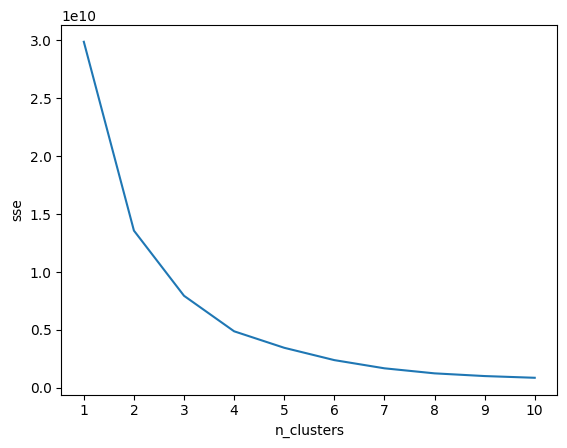

In [234]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

SSE = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=SEED)
  kmeans.fit(A)
  SSE.append(kmeans.inertia_)


plt.plot(range(1, 11), SSE)

plt.xlabel('n_clusters')
plt.ylabel('sse')
plt.xticks(range(1,11,1))

plt.show()

In [235]:
kmeans_model = KMeans(n_clusters = 3).fit(A)
clusters = kmeans_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [236]:
k=3
for i in range(k):
    num = list(clusters).count(i)
    print(f'Cluster {i}: n = {num}')

Cluster 0: n = 523
Cluster 1: n = 523
Cluster 2: n = 107


# UMAP

In [237]:
!pip install umap-learn

In [238]:
import umap.umap_ as umap

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


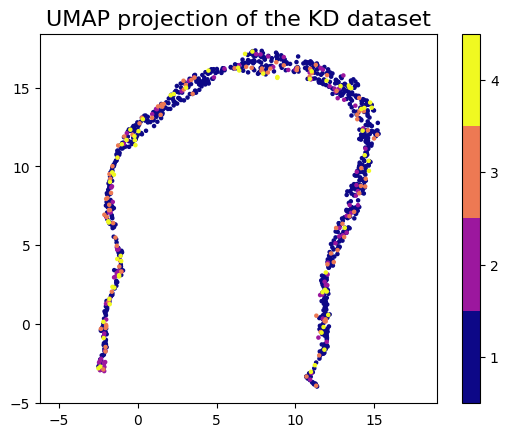

In [239]:
import matplotlib as mpl
#reducer = umap.UMAP(random_state=SEED, n_neighbors=4,min_dist=0.5,metric='chebyshev')
reducer = umap.UMAP(random_state=SEED, n_neighbors=50,min_dist=0.3,metric='chebyshev')
reducer.fit(A)
embedding = reducer.transform(A)

cluster_centers = reducer.transform(kmeans.cluster_centers_)
cluster_names = ['1', '2','3']

plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='plasma',  s=5)
plt.gca().set_aspect('equal', 'datalim')

plt.title('UMAP projection of the KD dataset', fontsize=16)
#for i, label in enumerate(cluster_names):
#    plt.annotate(label, cluster_centers[i], size=8)

plt.colorbar(boundaries=np.arange(1,6,1)-0.5).set_ticks(np.arange(1,5,1))

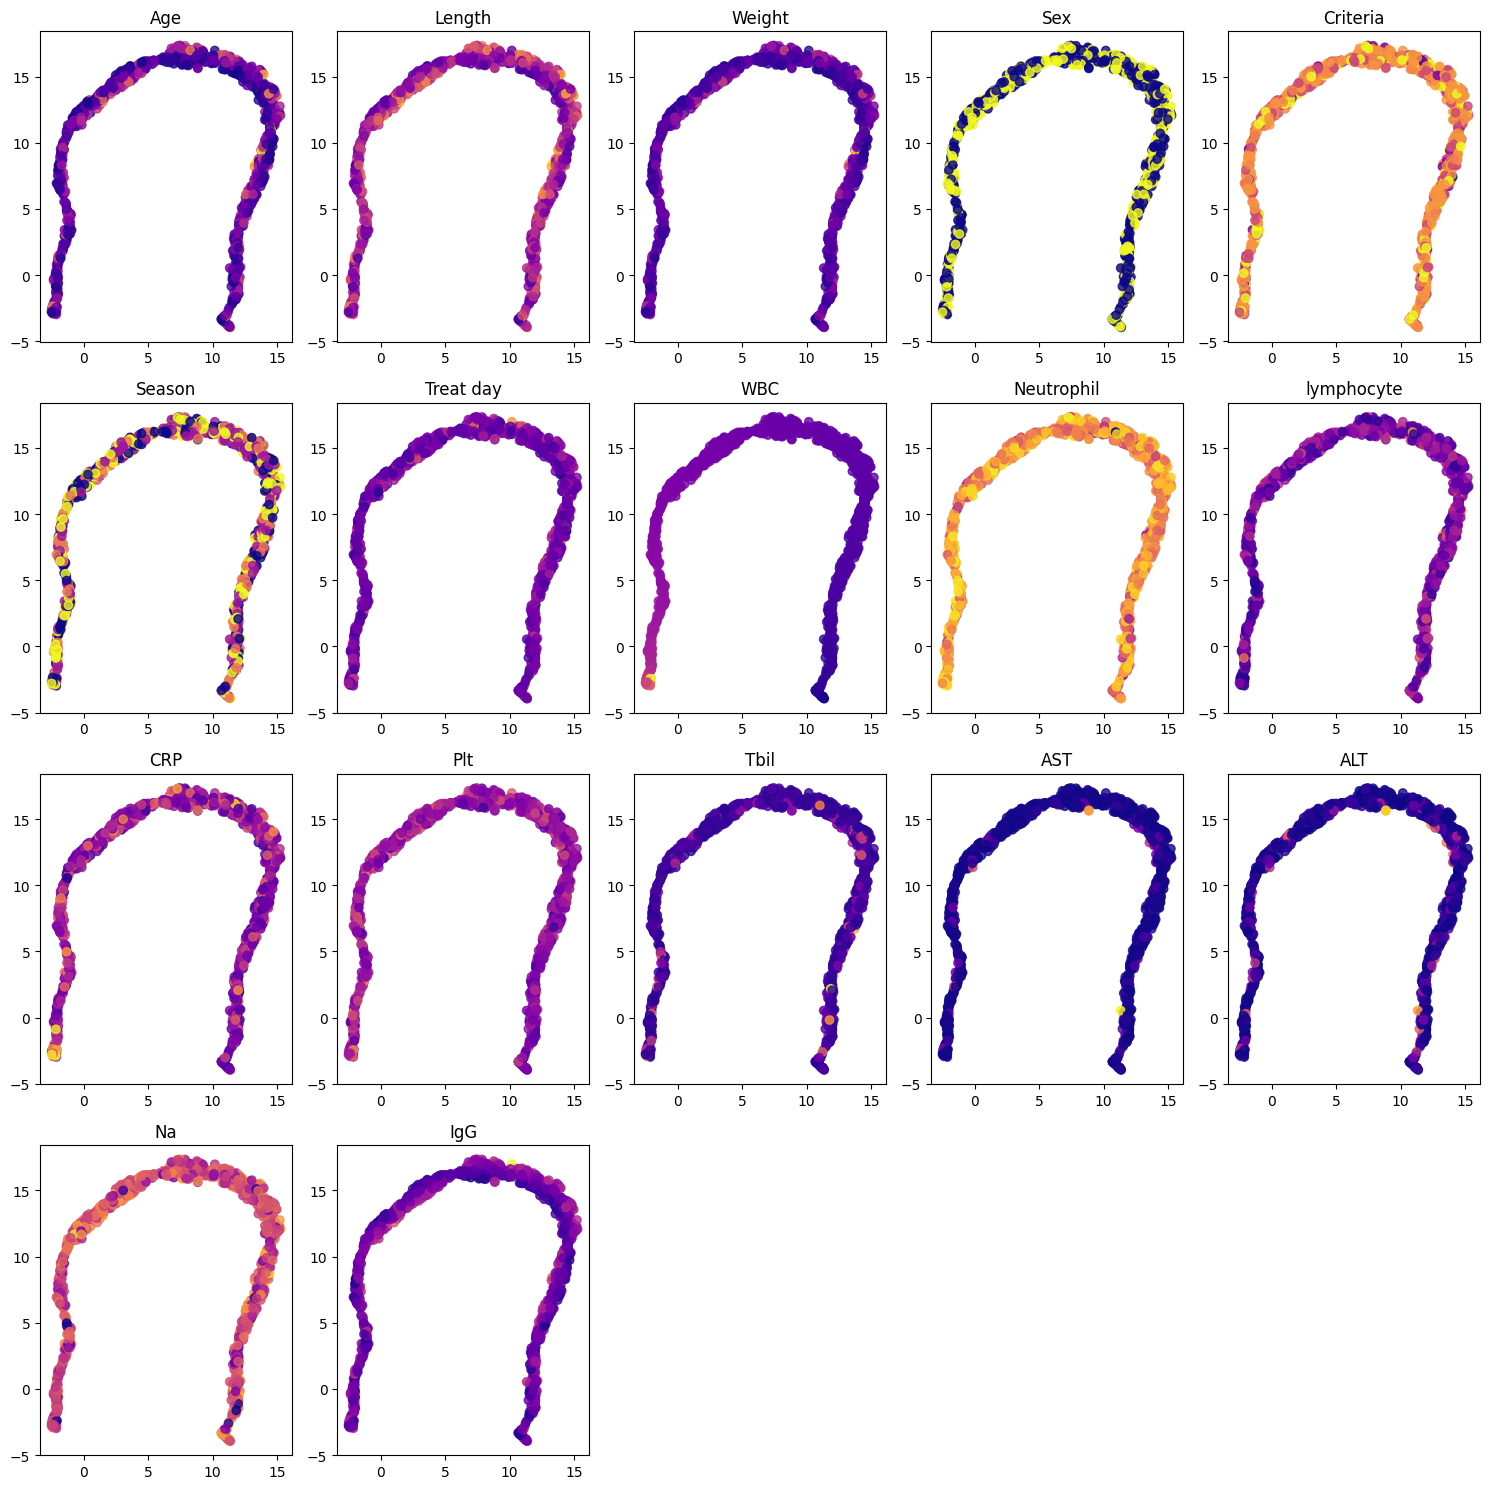

In [240]:
fig = plt.figure(figsize=(15,15))
cols = A.columns
for i, col in enumerate(cols):
    ax = fig.add_subplot(4, 5, i+1, title=col)
    ax.scatter(embedding[:, 0], embedding[:, 1],
        c=A[col], cmap='plasma', alpha=0.8)
fig.tight_layout()
plt.show()

# Quantification

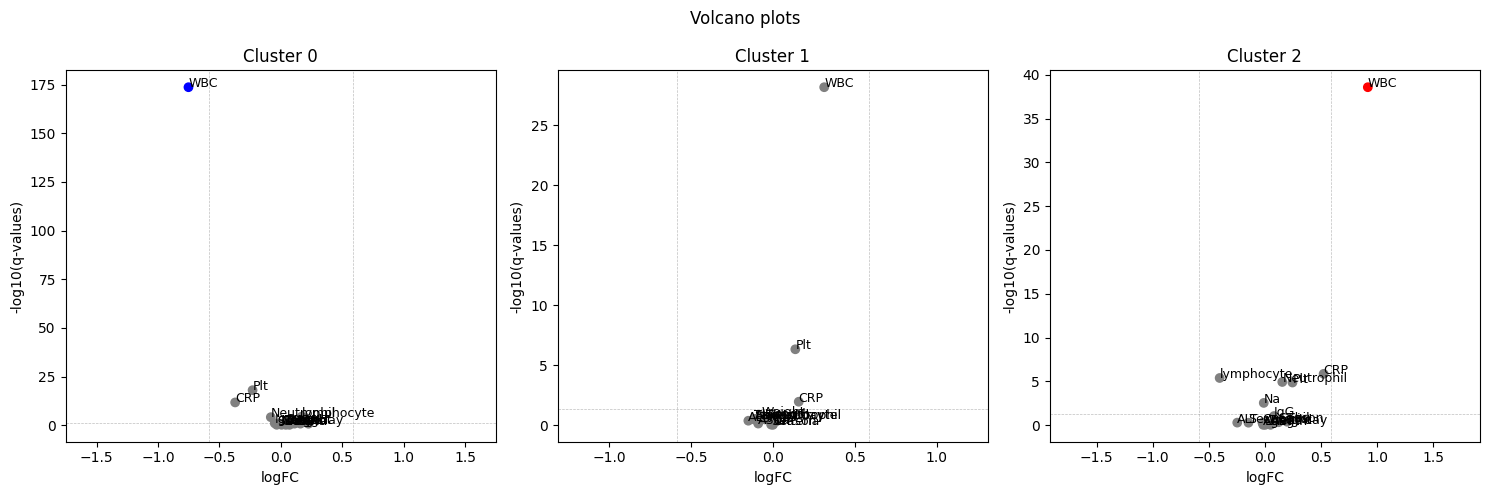

In [241]:
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests

df_features_with_clusters = A.copy()
df_features_with_clusters['cluster'] = clusters
cols = A.columns

q_threshold = 0.05
fc_threshold = 1.5

fig = plt.figure(figsize=(15,5))

for i in range(k):
    p_values = []
    fcs = []

    for col in cols:

        group_1 = df_features_with_clusters[df_features_with_clusters['cluster'] == i][col]
        group_2 = df_features_with_clusters[df_features_with_clusters['cluster'] != i][col]
        p_value = stats.ttest_ind(group_1, group_2, equal_var=False)[1]
        p_values.append(p_value)


        fc = group_1.mean()/group_2.mean()
        fcs.append(fc)


    q_values = multipletests(p_values, method='fdr_bh')[1]


    colors = []
    for col, q_value, fc in zip(cols, q_values, fcs):

        if q_value < q_threshold and fc > fc_threshold:
            colors.append('red')

        elif q_value < q_threshold and fc < 1/fc_threshold:
            colors.append('blue')

        else:
            colors.append('gray')

    ax = fig.add_subplot(1,3,i+1)
    ax.scatter(np.log2(fcs), -np.log10(q_values),
    c=colors)

    max_val = max(abs(np.nanmin(np.log2(fcs)[np.log2(fcs) != -np.inf])), max(np.log2(fcs)))
    ax.set_xlim([-max_val-1, max_val+1])
    ax.set_ylim(ax.get_ylim())


    ax.hlines([-np.log10(q_threshold)], -max_val-1, max_val+1, 'gray', 'dashed', linewidth=0.5, alpha=0.5)
    ax.vlines([np.log2(fc_threshold), np.log2(1/fc_threshold)], ax.get_ylim()[0], ax.get_ylim()[1], 'gray', 'dashed', linewidth=0.5, alpha=0.5)


    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('logFC')
    ax.set_ylabel('-log10(q-values)')
    for j, label in enumerate(cols):
        ax.annotate(label, (np.log2(fcs)[j], -np.log10(q_values)[j]), size=9)

fig.suptitle('Volcano plots')
fig.tight_layout()
plt.show()

# Other

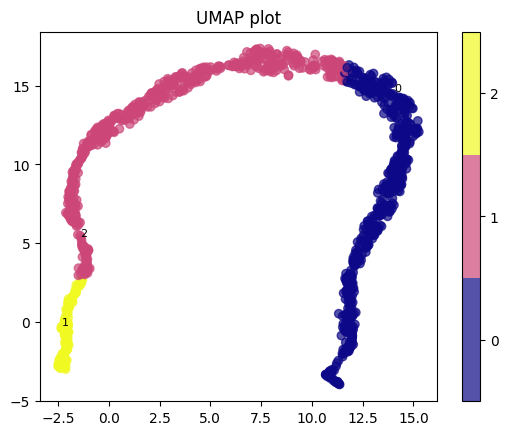

In [242]:
cluster_centers = reducer.transform(kmeans.cluster_centers_)
cluster_names = ['0', '1','2']

plt.scatter(embedding[:, 0], embedding[:, 1],
    c=clusters, cmap='plasma', alpha=0.7)
plt.title('UMAP plot')
for i, label in enumerate(cluster_names):
    plt.annotate(label, cluster_centers[i], size=8)
plt.colorbar(boundaries=np.arange(0,4,1)-0.5).set_ticks(np.arange(0,3,1))
plt.show()

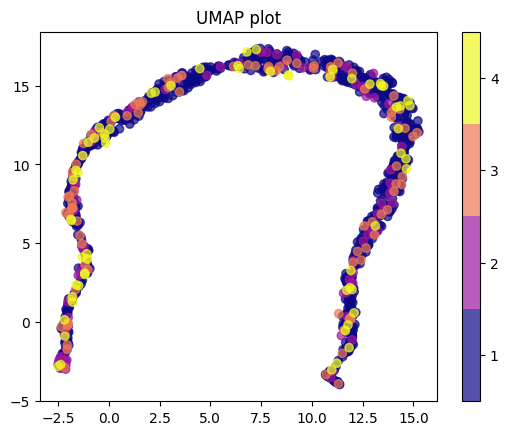

In [243]:
cluster_centers = reducer.transform(kmeans.cluster_centers_)
cluster_names = ['1', '2','3','4']

plt.scatter(embedding[:, 0], embedding[:, 1],
    c=y, cmap='plasma', alpha=0.7)
plt.title('UMAP plot')



plt.colorbar(boundaries=np.arange(1,6,1)-0.5).set_ticks(np.arange(1,5,1))
plt.show()

In [244]:
B = df_features_with_clusters.copy()
B['Group'] = y

In [245]:
B[B['cluster']==0]["Group"].value_counts(),B[B['cluster']==1]["Group"].value_counts(),B[B['cluster']==2]["Group"].value_counts()

(Group
 1    431
 2     36
 3     32
 4     24
 Name: count, dtype: int64,
 Group
 1    402
 3     51
 2     38
 4     32
 Name: count, dtype: int64,
 Group
 1    75
 2    15
 3     9
 4     8
 Name: count, dtype: int64)

In [263]:
import scipy.stats as st
df = pd.DataFrame([[431,402,75],
                   [32,51,9]])
x2, p1, dof, e = st.chi2_contingency(df,correction=False)

print(p1)

0.06617715858595616


In [264]:
df = pd.DataFrame([[36,38,15],
                   [24,32,8]])
x2, p1, dof, e = st.chi2_contingency(df,correction=False)

print(p1)

0.6107666316010755


# +Chutou

'Age', 'Length', 'Weight', 'Sex', 'Criteria', 'Season',
       'Treat day',
       'IVIG-nonres', 'Second_line_nonres', 'PSL_use1', 'IFX_use1',         
       'WBC',  'Neutrophil',  'lymphocyte', 'CRP',
       'Plt','Tbil','AST', 'ALT', 'Na', 'IgG'

In [248]:
raw2 = pd.read_csv("/content/drive/MyDrive/iwashima_project_2.csv", encoding='cp932')
add = pd.read_csv("/content/drive/MyDrive/Dr.Miyagi_R6_5_31_DB_1_add.csv", encoding='cp932')

raw3 = pd.merge(raw2.T, add.T, left_index=True, right_index=True).T

raw3_2 = raw3.loc[:,['Age', 'Length', 'Weight', 'sex', '5th Criteria count',
       'Treat day', 'preWBC_1',  'preNetro',  'pre_Lym', 'preCRP_1',
       'prePlt','preTbil','preAST', 'preALT', 'preNa', 'preIgG']]
raw3_2.columns = ['Age', 'Length', 'Weight', 'sex', 'Criteria',
       'Treat day', 'WBC',  'Neutrophil',  'lymphocyte', 'CRP',
       'Plt','Tbil','AST', 'ALT', 'Na', 'IgG']
raw3_2['sex'] = raw3_2['sex'].replace('F',0).replace('M',1).replace('female',0).replace('male',1)
Dx_2 = raw3_2
Dy_2 = raw3.loc[:,"Response"]

In [249]:
X

,Age,Length,Weight,Sex,Criteria,Season,Treat day,WBC,Neutrophil,lymphocyte,CRP,Plt,Tbil,AST,ALT,Na,IgG
2,2.166667,83.0,11.00,0,4.0,1.0,7.0,4500.0,61.0,NaN,0.13,21.2,0.2,60.0,12.0,132.0,NaN
3,1.000000,74.0,8.80,1,4.0,3.0,5.0,7700.0,57.0,30.0,0.13,34.3,NaN,51.0,14.0,138.0,NaN
4,0.833333,74.8,9.10,0,3.0,1.0,7.0,8500.0,42.0,37.0,0.14,44.9,1.8,70.0,181.0,139.0,514.0
5,2.083333,87.0,11.00,1,5.0,1.0,6.0,8200.0,9.4,NaN,0.18,13.6,0.3,42.0,15.0,135.0,NaN
6,1.083333,71.0,8.60,0,4.0,0.0,4.0,14200.0,43.5,44.5,0.18,55.6,0.6,88.0,376.0,137.0,538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,1.166667,77.0,9.85,1,6.0,0.0,5.0,9300.0,36.0,50.0,20.14,40.2,0.4,20.0,10.0,134.0,1026.0
1160,1.166667,76.8,9.85,1,5.0,0.0,5.0,12570.0,NaN,NaN,20.14,40.2,0.4,28.0,19.0,134.0,1026.0
1168,5.000000,113.7,22.30,1,6.0,3.0,5.0,14500.0,93.4,NaN,21.50,29.4,1.1,91.0,108.0,133.0,NaN
1180,0.416667,66.0,6.96,1,4.0,3.0,7.0,29900.0,68.0,26.0,26.85,35.1,0.4,34.0,14.0,133.0,602.0


In [250]:
Dat2 = Dx_2.copy()
# Dat2['NLR'] = Dat2['Neutrophil']/Dat2['lymphocyte']
# Dat2['PLR'] = Dat2['Plt']/Dat2['lymphocyte']

In [251]:
DF = pd.concat([X,Dat2],join='inner')
DF.shape  ,DF.columns

((1527, 15),
 Index(['Age', 'Length', 'Weight', 'Criteria', 'Treat day', 'WBC', 'Neutrophil',
        'lymphocyte', 'CRP', 'Plt', 'Tbil', 'AST', 'ALT', 'Na', 'IgG'],
       dtype='object'))

In [252]:
X.shape

(1153, 17)

In [253]:
pd.DataFrame(y).value_counts()

Group
1        908
3         92
2         89
4         64
Name: count, dtype: int64

In [254]:
Dy_2.value_counts()

Response
1    226
2    105
3     30
4     13
Name: count, dtype: int64

In [255]:
DF_y = pd.concat([y,Dy_2])
DF_y.columns = ['Group']
DF_y.value_counts()

1    1134
2     194
3     122
4      77
Name: count, dtype: int64

In [256]:
imp_mean = IterativeImputer(random_state=SEED)
A= imp_mean.fit_transform(DF)
A= pd.DataFrame(A)
A.index = DF.index
A.columns = DF.columns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

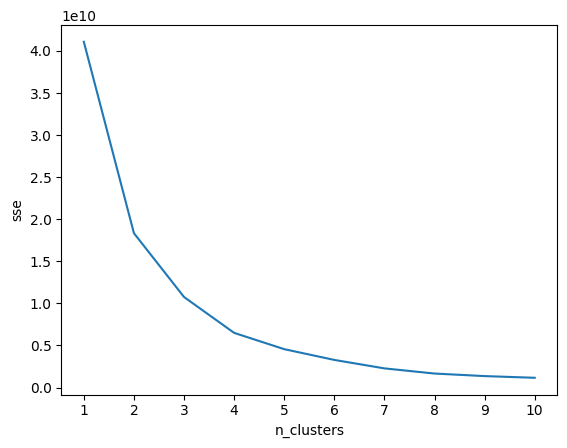

In [257]:
from sklearn.cluster import KMeans

SSE = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(A)
  SSE.append(kmeans.inertia_)


plt.plot(range(1, 11), SSE)

plt.xlabel('n_clusters')
plt.ylabel('sse')
plt.xticks(range(1,11,1))

plt.show()

In [258]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters = 3).fit(A)
clusters = kmeans_model.labels_

k=3
for i in range(k):
    num = list(clusters).count(i)
    print(f'Cluster {i}: n = {num}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: n = 144
Cluster 1: n = 697
Cluster 2: n = 686


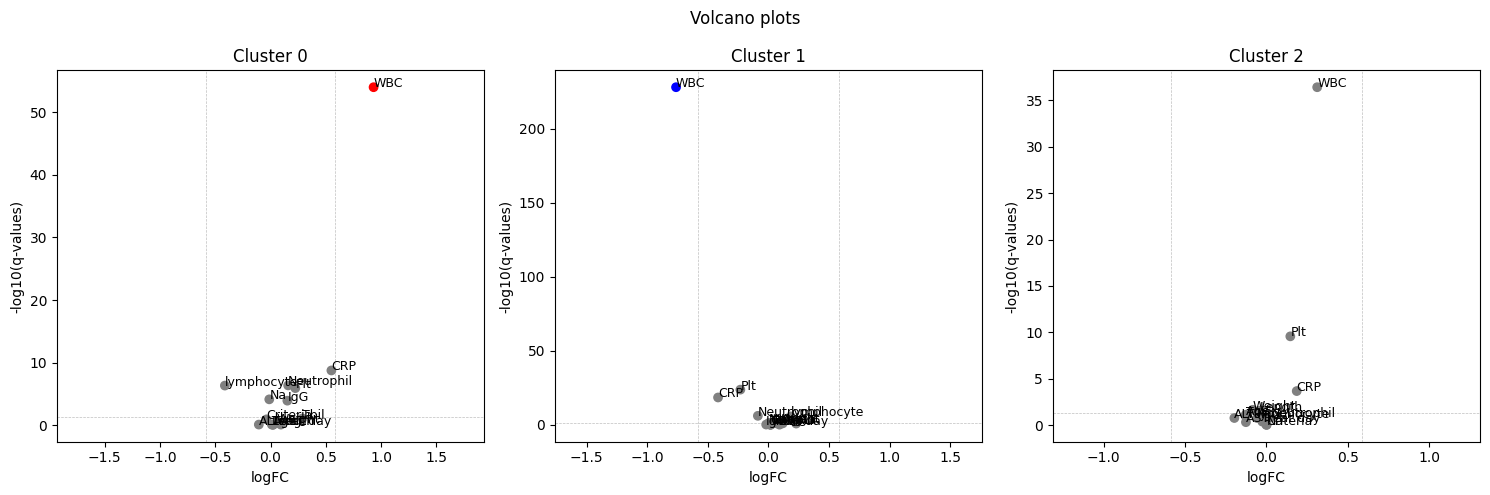

In [259]:
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests

df_features_with_clusters = A.copy()
df_features_with_clusters['cluster'] = clusters
cols = A.columns

q_threshold = 0.05
fc_threshold = 1.5

fig = plt.figure(figsize=(15,5))

for i in range(k):
    p_values = []
    fcs = []

    for col in cols:

        group_1 = df_features_with_clusters[df_features_with_clusters['cluster'] == i][col]
        group_2 = df_features_with_clusters[df_features_with_clusters['cluster'] != i][col]
        p_value = stats.ttest_ind(group_1, group_2, equal_var=False)[1]
        p_values.append(p_value)


        fc = group_1.mean()/group_2.mean()
        fcs.append(fc)


    q_values = multipletests(p_values, method='fdr_bh')[1]


    colors = []
    for col, q_value, fc in zip(cols, q_values, fcs):

        if q_value < q_threshold and fc > fc_threshold:
            colors.append('red')

        elif q_value < q_threshold and fc < 1/fc_threshold:
            colors.append('blue')

        else:
            colors.append('gray')

    ax = fig.add_subplot(1,3,i+1)
    ax.scatter(np.log2(fcs), -np.log10(q_values),
    c=colors)

    max_val = max(abs(np.nanmin(np.log2(fcs)[np.log2(fcs) != -np.inf])), max(np.log2(fcs)))
    ax.set_xlim([-max_val-1, max_val+1])
    ax.set_ylim(ax.get_ylim())


    ax.hlines([-np.log10(q_threshold)], -max_val-1, max_val+1, 'gray', 'dashed', linewidth=0.5, alpha=0.5)
    ax.vlines([np.log2(fc_threshold), np.log2(1/fc_threshold)], ax.get_ylim()[0], ax.get_ylim()[1], 'gray', 'dashed', linewidth=0.5, alpha=0.5)


    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('logFC')
    ax.set_ylabel('-log10(q-values)')
    for j, label in enumerate(cols):
        ax.annotate(label, (np.log2(fcs)[j], -np.log10(q_values)[j]), size=9)

fig.suptitle('Volcano plots')
fig.tight_layout()
plt.show()

In [260]:
B = df_features_with_clusters.copy()
B['Group'] = DF_y

In [261]:
B[B['cluster']==0]["Group"].value_counts(),B[B['cluster']==1]["Group"].value_counts(),B[B['cluster']==2]["Group"].value_counts()

(Group
 1    86
 2    31
 3    17
 4    10
 Name: count, dtype: int64,
 Group
 1    546
 2     78
 3     44
 4     29
 Name: count, dtype: int64,
 Group
 1    502
 2     85
 3     61
 4     38
 Name: count, dtype: int64)

In [266]:
df = pd.DataFrame([86,546,502],
                   [17,44,61])
x2, p1, dof, e = st.chi2_contingency(df,correction=False)

print(p1)

1.0


In [267]:
df = pd.DataFrame([31,78,85],
                   [10,29,38])
x2, p1, dof, e = st.chi2_contingency(df,correction=False)

print(p1)

1.0
